# Linear
Loading up our data and splitting it:

In [13]:
import pandas as pd
import pickle

with open('df.pkl', 'rb') as f:
    df = pickle.load(f)

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
work = train.copy()

Let's examine some linear relations.

Bias of 3.6034492426221996
Coefficients of [2.09732354]


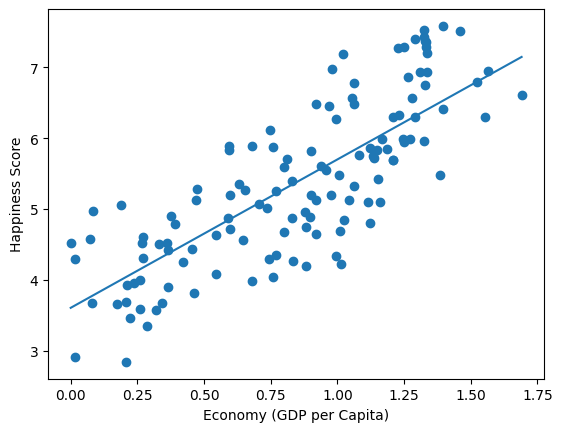

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

reg_1 = ElasticNet(alpha=0.01, l1_ratio=0.5)
x_1 = work[['Economy (GDP per Capita)']]
y_1 = work['Happiness Score']

reg_1.fit(x_1, y_1)
print(f'Bias of {reg_1.intercept_}\nCoefficients of {reg_1.coef_}')

g1_int = reg_1.intercept_
g1_coef = reg_1.coef_[0]

g1_line_min_y = g1_int + g1_coef * work['Economy (GDP per Capita)'].min()
g1_line_max_y = g1_int + g1_coef * work['Economy (GDP per Capita)'].max()
g1_line_y = [g1_line_min_y, g1_line_max_y]

g1_line_min_x = work['Economy (GDP per Capita)'].min()
g1_line_max_x = work['Economy (GDP per Capita)'].max()
g1_line_x = [g1_line_min_x, g1_line_max_x]

plt.scatter(work['Economy (GDP per Capita)'], work['Happiness Score'])
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.plot(g1_line_x, g1_line_y)
plt.show()

Appears to be correlated. Let's try a different feature:

Bias of 3.4818824436901465
Coefficients of [3.00708859]


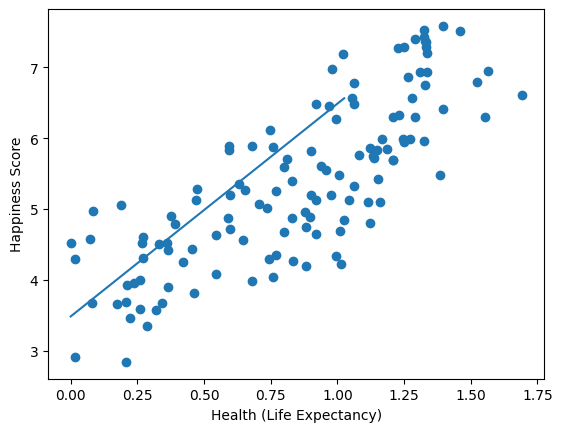

In [15]:
reg_2 = ElasticNet(alpha=0.01, l1_ratio=0.5)
x_2 = work[['Health (Life Expectancy)']]
y_2 = work['Happiness Score']

reg_2.fit(x_2, y_2)
print(f'Bias of {reg_2.intercept_}\nCoefficients of {reg_2.coef_}')

g2_int = reg_2.intercept_
g2_coef = reg_2.coef_[0]

g2_line_min_y = g2_int + g2_coef * work['Health (Life Expectancy)'].min()
g2_line_max_y = g2_int + g2_coef * work['Health (Life Expectancy)'].max()
g2_line_y = [g2_line_min_y, g2_line_max_y]

g2_line_min_x = work['Health (Life Expectancy)'].min()
g2_line_max_x = work['Health (Life Expectancy)'].max()
g2_line_x = [g2_line_min_x, g2_line_max_x]

plt.scatter(work['Economy (GDP per Capita)'], work['Happiness Score'])
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.plot(g2_line_x, g2_line_y)
plt.show()

Same case here. Let's combine multiple features here:

In [16]:
reg_3 = ElasticNet(alpha=0.5, l1_ratio=0.5)

x_3 = work[['Economy (GDP per Capita)', 'Freedom', 'Health (Life Expectancy)']]
y_3 = work['Happiness Score']

reg_3.fit(x_3, y_3)
print(f'Bias of {reg_3.intercept_}\nCoefficients of {reg_3.coef_}')

Bias of 5.120129127530527
Coefficients of [0.29378889 0.         0.        ]


Now to analyze performance:

In [17]:
print(f'reg_1 score: {reg_1.score(x_1, y_1)}')
print(f'reg_2 score: {reg_2.score(x_2, y_2)}')
print(f'reg_3 score: {reg_3.score(x_3, y_3)}')

reg_1 score: 0.6336147426807623
reg_2 score: 0.5435402242105523
reg_3 score: 0.15900280850715298
